1. Import Library yang Diperlukan

Tujuan: Mengimpor pustaka yang dibutuhkan untuk pengolahan data, pembuatan model, dan evaluasi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from google.colab import files
uploaded = files.upload()

import os
os.listdir()

Saving mentalhealth_dataset.xlsx to mentalhealth_dataset.xlsx


['.config', 'mentalhealth_dataset.xlsx', 'sample_data']

2. Load Dataset
Tujuan: Memuat dataset yang digunakan untuk pelatihan dan pengujian model.


In [2]:
# step 3
# Load dataset
df = pd.read_excel('mentalhealth_dataset.xlsx')

# Encode categorical variables: Gender, Course, and YearOfStudy
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Course'] = df['Course'].map({'Biotechnology': 0, 'Engineering': 1})
df['YearOfStudy'] = df['YearOfStudy'].map({'Year 3': 3, 'year 4': 4})

# Check the data types and basic info
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   1000 non-null   int64  
 1   Gender                      1000 non-null   int64  
 2   Age                         1000 non-null   int64  
 3   Course                      188 non-null    float64
 4   YearOfStudy                 259 non-null    float64
 5   CGPA                        1000 non-null   float64
 6   Depression                  1000 non-null   int64  
 7   Anxiety                     1000 non-null   int64  
 8   PanicAttack                 1000 non-null   int64  
 9   SpecialistTreatment         1000 non-null   int64  
 10  SymptomFrequency_Last7Days  1000 non-null   int64  
 11  HasMentalHealthSupport      1000 non-null   int64  
 12  SleepQuality                1000 non-null   int64  
 13  StudyStressLevel            1000 n

,0
Timestamp,0
Gender,0
Age,0
Course,812
YearOfStudy,741
CGPA,0
Depression,0
Anxiety,0
PanicAttack,0
SpecialistTreatment,0


3. Pembagian Dataset Menjadi Data Latih dan Uji

Tujuan: Membagi dataset menjadi dua bagian: satu untuk pelatihan dan satu untuk pengujian.


In [3]:
# Fitur (X) dan target (y)
X = df.drop(['Timestamp', 'Depression'], axis=1)
y = df['Depression']

# Pembagian dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4. Preprocessing: Standardization dan Imputation

Tujuan: Melakukan standarisasi data agar model bekerja dengan baik dan mengisi nilai yang hilang (jika ada).


In [4]:
# Preprocessing: Standardization and imputation
scaler = StandardScaler()
imputer = SimpleImputer(strategy='mean')

# Pipeline untuk preprocessing
pipeline = make_pipeline(imputer, scaler)

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)


5. Membuat dan Melatih Model

Tujuan: Membuat dan melatih berbagai model machine learning (algoritma RF, LR, SVM, KNN, DT, GBoost)


In [5]:
# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [6]:
# Model 2: Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [7]:
# Model 3: Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

In [8]:
# Model 4: K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [9]:
# Model 5: Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

In [10]:
# Model 6: Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

6. Evaluasi Model

Tujuan: Mengevaluasi performa setiap model menggunakan metrik yang sesuai (akurasi (%))


In [11]:
# Menyusun hasil prediksi dan evaluasi untuk setiap model
models = {
    "Random Forest": y_pred_rf,
    "Logistic Regression": y_pred_log_reg,
    "Support Vector Machine": y_pred_svm,
    "K-Nearest Neighbors": y_pred_knn,
    "Decision Tree": y_pred_dt,
    "Gradient Boosting": y_pred_gb
}

In [12]:
# Menampilkan hasil evaluasi untuk setiap model
for model_name, y_pred in models.items():
    print(f"\n{model_name} - Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")



Random Forest - Accuracy: 0.4400
Confusion Matrix:
[[52 47]
 [65 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.53      0.48        99
           1       0.43      0.36      0.39       101

    accuracy                           0.44       200
   macro avg       0.44      0.44      0.44       200
weighted avg       0.44      0.44      0.44       200


Logistic Regression - Accuracy: 0.5600
Confusion Matrix:
[[57 42]
 [46 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.56        99
           1       0.57      0.54      0.56       101

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200


Support Vector Machine - Accuracy: 0.4600
Confusion Matrix:
[[52 47]
 [61 40]]
Classification Report:
              precision    recall  f1-score   sup

7. Membuat Tabel Perbandingan Akurasi

Tujuan: Menyusun tabel yang menampilkan perbandingan akurasi dari setiap model


In [13]:
# Membuat tabel perbandingan akurasi
accuracy_comparison = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors", "Decision Tree", "Gradient Boosting"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_log_reg),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_gb)
    ]
})


In [14]:
# Menampilkan tabel perbandingan akurasi
accuracy_comparison.sort_values(by='Accuracy', ascending=False, inplace=True)
print("\nModel Accuracy Comparison:")
print(accuracy_comparison)


Model Accuracy Comparison:
                    Model  Accuracy
1     Logistic Regression     0.560
5       Gradient Boosting     0.540
4           Decision Tree     0.535
2  Support Vector Machine     0.460
3     K-Nearest Neighbors     0.455
0           Random Forest     0.440


9. Visualisasi Perbandingan Akurasi

Tujuan: Membuat grafik untuk memvisualisasikan perbandingan akurasi model


<ipython-input-15-bbde276b9947>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=accuracy_comparison, palette="viridis")


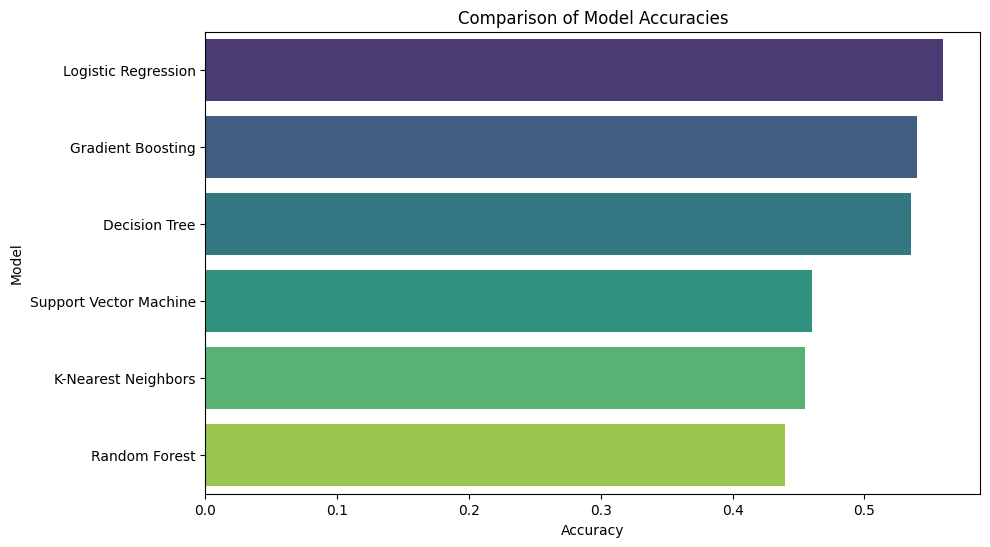

In [15]:
# Visualisasi perbandingan akurasi
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=accuracy_comparison, palette="viridis")
plt.title('Comparison of Model Accuracies')
plt.show()